In [4]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.colors import ListedColormap 
import random 
 #Creating GridworldLearning Class and it's subsequent methods in one cell
class GridWorldQLearning: 
    def __init__(self, grid_size=5, learning_rate=0.1, discount_factor=0.95,  epsilon=0.1, epsilon_decay=0.995, min_epsilon=0.01): 
        self.grid_size = grid_size 
        self.alpha = learning_rate 
        self.gamma = discount_factor 
        self.epsilon = epsilon 
        self.epsilon_decay = epsilon_decay 
        self.min_epsilon = min_epsilon 
         
        # Actions: 0=Up, 1=Down, 2=Left, 3=Right 
        self.actions = ['Up', 'Down', 'Left', 'Right'] 
        self.n_actions = len(self.actions) 
         
        # Initialize Q-table: [state_row, state_col, action] 
        self.q_table = np.zeros((grid_size, grid_size, self.n_actions)) 
         
        # Set start and goal positions 
        self.start_pos = (0, 0) 
        self.goal_pos = (grid_size-1, grid_size-1) 
         
        # Set obstacles (optional) 
        self.obstacles = [(2, 2), (2, 3), (3, 2)] 
         
        # Statistics tracking 
        self.episode_rewards = [] 
        self.episode_steps = [] 
         
    def is_valid_position(self, pos): 
        """Check if position is valid (within bounds and not obstacle)""" 
        row, col = pos 
        if row < 0 or row >= self.grid_size or col < 0 or col >= self.grid_size: 
            return False 
        if pos in self.obstacles: 
            return False 
        return True 
     
    def get_next_position(self, current_pos, action): 
        """Get next position based on current position and action""" 
        row, col = current_pos 
         
        if action == 0:    # Up 
            next_pos = (row - 1, col) 
        elif action == 1:  # Down 
            next_pos = (row + 1, col) 
        elif action == 2:  # Left 
            next_pos = (row, col - 1) 
        elif action == 3:  # Right 
            next_pos = (row, col + 1) 
         
        # If next position is invalid, stay in current position 
        if not self.is_valid_position(next_pos): 
            return current_pos 
         
        return next_pos 
     
    def get_reward(self, current_pos, next_pos): 
        """Calculate reward for moving from current_pos to next_pos""" 
        if next_pos == self.goal_pos: 
            return 100  # Large positive reward for reaching goal 
        elif next_pos in self.obstacles: 
            return -10  # Penalty for hitting obstacle 
        elif next_pos == current_pos:  # Hit wall 
            return -1   # Small penalty for invalid move 
        else: 
            return -0.1 # Small penalty for each step to encourage efficiency 
     
    def choose_action(self, state, training=True): 
        """Choose action using ε-greedy policy""" 
        if training and random.random() < self.epsilon: 
            # Explore: choose random action 
            return random.randint(0, self.n_actions - 1) 
        else: 
            # Exploit: choose best action based on Q-values 
            row, col = state 
            return np.argmax(self.q_table[row, col, :]) 
     
    def update_q_value(self, current_state, action, reward, next_state): 
        """Update Q-value using the Bellman equation""" 
        current_row, current_col = current_state 
        next_row, next_col = next_state 
         
        # Current Q-value 
        current_q = self.q_table[current_row, current_col, action] 
         
        # Maximum Q-value for next state 
        max_next_q = np.max(self.q_table[next_row, next_col, :]) 
         
        # Bellman equation update 
        new_q = current_q + self.alpha * (reward + self.gamma * max_next_q - 
current_q) 
         
        # Update Q-table 
        self.q_table[current_row, current_col, action] = new_q 
     
    def train_episode(self): 
        """Run one training episode""" 
        current_state = self.start_pos 
        total_reward = 0 
        steps = 0 
        max_steps = self.grid_size * self.grid_size * 2  # Prevent infinite loops 
         
        while current_state != self.goal_pos and steps < max_steps: 
            # Choose action 
            action = self.choose_action(current_state, training=True) 
             
            # Take action and observe result 
            next_state = self.get_next_position(current_state, action) 
            reward = self.get_reward(current_state, next_state) 
             
            # Update Q-value 
            self.update_q_value(current_state, action, reward, next_state) 
             
            # Move to next state 
            current_state = next_state 
            total_reward += reward 
            steps += 1 
         
        # Decay epsilon for less exploration over time 
        if self.epsilon > self.min_epsilon: 
            self.epsilon *= self.epsilon_decay 
         
        return total_reward, steps 
     
    def train(self, episodes=1000): 
        """Train the agent for specified number of episodes""" 
        print("Starting Q-Learning Training...") 
        print(f"Episodes: {episodes}") 
        print(f"Grid Size: {self.grid_size}x{self.grid_size}") 
        print(f"Start: {self.start_pos}, Goal: {self.goal_pos}") 
        print(f"Obstacles: {self.obstacles}") 
        print("-" * 50) 
         
        for episode in range(episodes): 
            reward, steps = self.train_episode() 
            self.episode_rewards.append(reward) 
            self.episode_steps.append(steps) 
             
            # Print progress every 100 episodes 
            if (episode + 1) % 100 == 0: 
                avg_reward = np.mean(self.episode_rewards[-100:]) 
                avg_steps = np.mean(self.episode_steps[-100:]) 
                print(f"Episode {episode + 1}: Avg Reward = {avg_reward:.2f}, " 
                      f"Avg Steps = {avg_steps:.2f}, Epsilon = {self.epsilon:.3f}") 
     
    def test_policy(self): 
        """Test the learned policy""" 
        current_state = self.start_pos 
        path = [current_state] 
        total_reward = 0 
        steps = 0 
        max_steps = self.grid_size * self.grid_size * 2 
         
        print("\nTesting Learned Policy:") 
        print(f"Starting at: {current_state}") 
         
        while current_state != self.goal_pos and steps < max_steps: 
            # Choose best action (no exploration) 
            action = self.choose_action(current_state, training=False) 
            action_name = self.actions[action] 
             
            # Take action 
            next_state = self.get_next_position(current_state, action) 
            reward = self.get_reward(current_state, next_state) 
             
            print(f"Step {steps + 1}: Action = {action_name}, " 
                  f"Next State = {next_state}, Reward = {reward}") 
             
            path.append(next_state) 
            current_state = next_state 
            total_reward += reward 
            steps += 1 
         
        if current_state == self.goal_pos: 
            print(f"\n   Success! Reached goal in {steps} steps") 
            print(f"Total reward: {total_reward}") 
            print(f"Path: {' -> '.join(map(str, path))}") 
        else: 
            print(f"\n  Failed to reach goal within {max_steps} steps") 
         
        return path, total_reward, steps 
     
    def visualize_grid(self): 
        """Visualize the grid world""" 
        # Create grid for visualization 
        grid = np.zeros((self.grid_size, self.grid_size)) 
         
        # Mark different elements 
        grid[self.start_pos] = 1  # Start 
        grid[self.goal_pos] = 3   # Goal 
        for obs in self.obstacles: 
            grid[obs] = 2  # Obstacles 
         
        # Create custom colormap 
        colors = ['white', 'green', 'red', 'gold']  # Empty, Start, Obstacle, Goal 
        cmap = ListedColormap(colors) 
         
        plt.figure(figsize=(8, 8)) 
        plt.imshow(grid, cmap=cmap, vmin=0, vmax=3) 
         
        # Add grid lines 
        for i in range(self.grid_size + 1): 
            plt.axhline(i - 0.5, color='black', linewidth=1) 
            plt.axvline(i - 0.5, color='black', linewidth=1) 
         
        # Add labels 
        for i in range(self.grid_size): 
            for j in range(self.grid_size): 
                if (i, j) == self.start_pos: 
                    plt.text(j, i, 'START', ha='center', va='center', fontweight='bold') 
                elif (i, j) == self.goal_pos: 
                    plt.text(j, i, 'GOAL', ha='center', va='center', fontweight='bold') 
                elif (i, j) in self.obstacles: 
                    plt.text(j, i, 'X', ha='center', va='center', fontweight='bold', fontsize=20) 
         
        plt.title('Grid World Environment', fontsize=16, fontweight='bold') 
        plt.axis('off') 
        plt.tight_layout() 
        plt.show() 

    def create_maze_environment(): 
        agent = GridWorldQLearning(grid_size=6) 
        agent.obstacles = [(1,1), (1,2), (1,3), (3,1), (3,2), (3,3), (4,4)] 
        return agent 

    def create_sparse_environment(): 
        agent = GridWorldQLearning(grid_size=7) 
        agent.obstacles = [(2,2), (2,3), (3,2), (4,4), (4,5), (5,4)] 
        return agent 
    
    def visualize_policy(self): 
        """Visualize the learned policy""" 
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) 
         
        # Policy visualization 
        policy_grid = np.zeros((self.grid_size, self.grid_size)) 
        arrows = {0: '↑', 1: '↓', 2: '←', 3: '→'} 
         
        for i in range(self.grid_size): 
            for j in range(self.grid_size): 
                if (i, j) not in self.obstacles and (i, j) != self.goal_pos: 
                    best_action = np.argmax(self.q_table[i, j, :]) 
                    policy_grid[i, j] = best_action 
         
        # Plot policy 
        im1 = ax1.imshow(policy_grid, cmap='viridis', alpha=0.3) 
         
        # Add arrows and labels 
        for i in range(self.grid_size): 
            for j in range(self.grid_size): 
                if (i, j) == self.start_pos: 
                    ax1.text(j, i, 'START', ha='center', va='center',  
                            fontweight='bold', color='green', fontsize=10) 
                elif (i, j) == self.goal_pos: 
                    ax1.text(j, i, 'GOAL', ha='center', va='center',  
                            fontweight='bold', color='gold', fontsize=10) 
                elif (i, j) in self.obstacles: 
                    ax1.text(j, i, 'X', ha='center', va='center',  
                            fontweight='bold', color='red', fontsize=16) 
                else: 
                    best_action = int(policy_grid[i, j]) 
                    ax1.text(j, i, arrows[best_action], ha='center', va='center',  
                            fontsize=20, fontweight='bold') 
         
        ax1.set_title('Learned Policy (Best Actions)', fontweight='bold') 
        ax1.set_xticks(range(self.grid_size)) 
        ax1.set_yticks(range(self.grid_size)) 
        ax1.grid(True, alpha=0.3) 
         
        # Q-values heatmap for one action (e.g., Right) 
        q_values_right = self.q_table[:, :, 3]  # Right action 
        im2 = ax2.imshow(q_values_right, cmap='RdYlBu', interpolation='nearest') 
         
        # Add text annotations 
        for i in range(self.grid_size): 
            for j in range(self.grid_size): 
                text = ax2.text(j, i, f'{q_values_right[i, j]:.1f}',  
                               ha='center', va='center', color='black', fontweight='bold') 
         
        ax2.set_title('Q-Values for "Right" Action', fontweight='bold') 
        ax2.set_xticks(range(self.grid_size)) 
        ax2.set_yticks(range(self.grid_size)) 
        plt.colorbar(im2, ax=ax2) 
         
        plt.tight_layout() 
        plt.show() 
     
    def plot_training_progress(self): 
        """Plot training progress""" 
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5)) 
         
        # Smooth the curves using moving average 
        window_size = 50 
        if len(self.episode_rewards) >= window_size: 
            rewards_smooth = np.convolve(self.episode_rewards,  
                                       np.ones(window_size)/window_size, mode='valid') 
            steps_smooth = np.convolve(self.episode_steps,  
                                     np.ones(window_size)/window_size, mode='valid') 
            episodes_smooth = range(window_size-1, len(self.episode_rewards)) 
        else: 
            rewards_smooth = self.episode_rewards 
            steps_smooth = self.episode_steps 
            episodes_smooth = range(len(self.episode_rewards)) 
         
        # Plot rewards 
        ax1.plot(self.episode_rewards, alpha=0.3, color='blue', label='Raw') 
        ax1.plot(episodes_smooth, rewards_smooth, color='red', label='Smoothed') 
        ax1.set_xlabel('Episode') 
        ax1.set_ylabel('Total Reward') 
        ax1.set_title('Training Rewards Over Time') 
        ax1.legend() 
        ax1.grid(True, alpha=0.3) 
         
        # Plot steps 
        ax2.plot(self.episode_steps, alpha=0.3, color='blue', label='Raw') 
        ax2.plot(episodes_smooth, steps_smooth, color='red', label='Smoothed') 
        ax2.set_xlabel('Episode') 
        ax2.set_ylabel('Steps to Goal') 
        ax2.set_title('Steps to Goal Over Time') 
        ax2.legend() 
        ax2.grid(True, alpha=0.3) 
         
        plt.tight_layout() 
        plt.show() 
 
# Demonstration function for students 
def run_qlearning_demo(): 
    """Complete demonstration of Q-Learning""" 
    print("="*60) 
    print("Q-LEARNING DEMONSTRATION") 
    print("="*60) 
    configs = [ 
    {"learning_rate": 0.01, "epsilon": 0.1, "name": "Low Learning Rate"}, 
    {"learning_rate": 0.5, "epsilon": 0.1, "name": "High Learning Rate"}, 
    {"learning_rate": 0.1, "epsilon": 0.01, "name": "Low Exploration"}, 
    {"learning_rate": 0.1, "epsilon": 0.9, "name": "High Exploration"},] 
    for config in configs: 
        print(f"\nTesting: {config['name']}") 
        agent = GridWorldQLearning(learning_rate=config["learning_rate"],  
        epsilon=config["epsilon"]) 
        agent.train(episodes=200) 
        agent.test_policy()    
    return agent 
 

In [5]:

class DoubleQLearning(GridWorldQLearning):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
        # Two Q-tables
        self.q_table_a = np.zeros((self.grid_size, self.grid_size, self.n_actions))
        self.q_table_b = np.zeros((self.grid_size, self.grid_size, self.n_actions))
        # Combined Q-table for action selection
        self.q_table = (self.q_table_a + self.q_table_b) / 2

    def update_q_value(self, current_state, action, reward, next_state):
        current_row, current_col = current_state
        next_row, next_col = next_state

        if random.random() < 0.5:
            # Update Q_A
            current_q = self.q_table_a[current_row, current_col, action]
            best_next_action = np.argmax(self.q_table_a[next_row, next_col, :])
            next_q = self.q_table_b[next_row, next_col, best_next_action]
            new_q = current_q + self.alpha * (reward + self.gamma * next_q - current_q)
            self.q_table_a[current_row, current_col, action] = new_q
        else:
            # Update Q_B
            current_q = self.q_table_b[current_row, current_col, action]
            best_next_action = np.argmax(self.q_table_b[next_row, next_col, :])
            next_q = self.q_table_a[next_row, next_col, best_next_action]
            new_q = current_q + self.alpha * (reward + self.gamma * next_q - current_q)
            self.q_table_b[current_row, current_col, action] = new_q

        # Keep combined Q-table updated for policy selection
        self.q_table = (self.q_table_a + self.q_table_b) / 2


Q-LEARNING DEMONSTRATION

Testing: Low Learning Rate
Starting Q-Learning Training...
Episodes: 200
Grid Size: 5x5
Start: (0, 0), Goal: (4, 4)
Obstacles: [(2, 2), (2, 3), (3, 2)]
--------------------------------------------------
Episode 100: Avg Reward = 86.12, Avg Steps = 21.43, Epsilon = 0.061
Episode 200: Avg Reward = 98.94, Avg Steps = 9.91, Epsilon = 0.037

Testing Learned Policy:
Starting at: (0, 0)
Step 1: Action = Right, Next State = (0, 1), Reward = -0.1
Step 2: Action = Right, Next State = (0, 2), Reward = -0.1
Step 3: Action = Down, Next State = (1, 2), Reward = -0.1
Step 4: Action = Right, Next State = (1, 3), Reward = -0.1
Step 5: Action = Right, Next State = (1, 4), Reward = -0.1
Step 6: Action = Down, Next State = (2, 4), Reward = -0.1
Step 7: Action = Down, Next State = (3, 4), Reward = -0.1
Step 8: Action = Down, Next State = (4, 4), Reward = 100

   Success! Reached goal in 8 steps
Total reward: 99.3
Path: (0, 0) -> (0, 1) -> (0, 2) -> (1, 2) -> (1, 3) -> (1, 4) -> (2

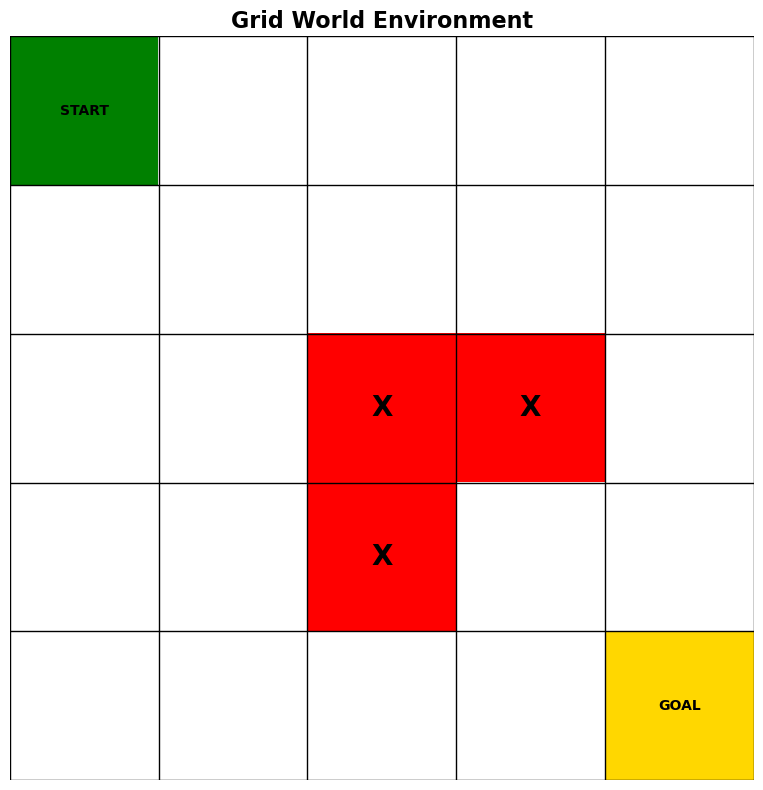

Starting Q-Learning Training...
Episodes: 1000
Grid Size: 5x5
Start: (0, 0), Goal: (4, 4)
Obstacles: [(2, 2), (2, 3), (3, 2)]
--------------------------------------------------
Episode 100: Avg Reward = 98.10, Avg Steps = 11.20, Epsilon = 0.200
Episode 200: Avg Reward = 98.70, Avg Steps = 9.72, Epsilon = 0.121
Episode 300: Avg Reward = 99.05, Avg Steps = 8.88, Epsilon = 0.073
Episode 400: Avg Reward = 99.07, Avg Steps = 8.45, Epsilon = 0.044
Episode 500: Avg Reward = 99.22, Avg Steps = 8.21, Epsilon = 0.027
Episode 600: Avg Reward = 99.21, Avg Steps = 8.25, Epsilon = 0.016
Episode 700: Avg Reward = 99.27, Avg Steps = 8.10, Epsilon = 0.010
Episode 800: Avg Reward = 99.29, Avg Steps = 8.05, Epsilon = 0.010
Episode 900: Avg Reward = 99.24, Avg Steps = 8.11, Epsilon = 0.010
Episode 1000: Avg Reward = 99.29, Avg Steps = 8.03, Epsilon = 0.010

Testing Learned Policy:
Starting at: (0, 0)
Step 1: Action = Down, Next State = (1, 0), Reward = -0.1
Step 2: Action = Right, Next State = (1, 1), Rew

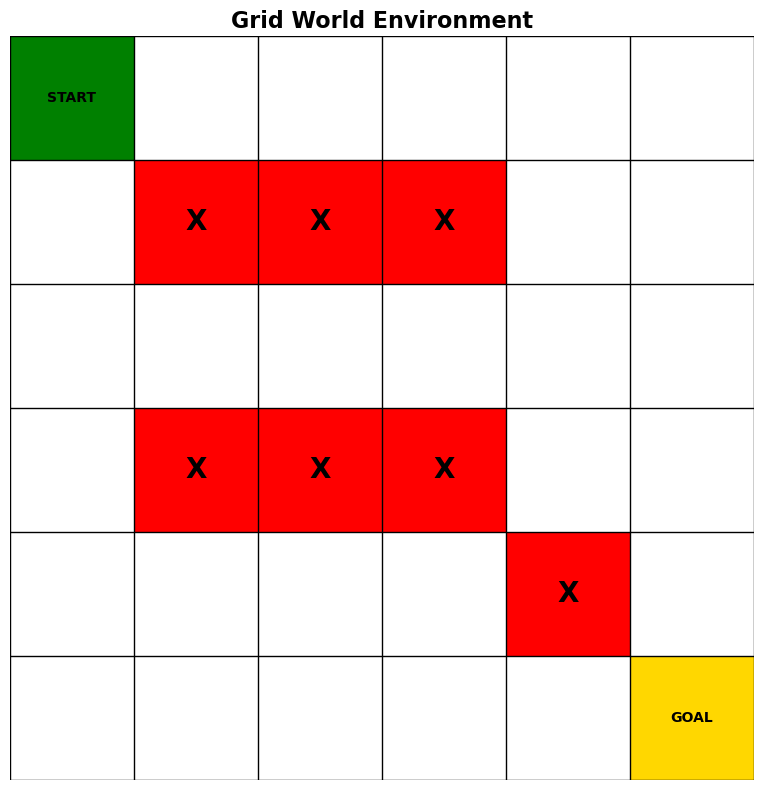

Starting Q-Learning Training...
Episodes: 1000
Grid Size: 6x6
Start: (0, 0), Goal: (5, 5)
Obstacles: [(1, 1), (1, 2), (1, 3), (3, 1), (3, 2), (3, 3), (4, 4)]
--------------------------------------------------
Episode 100: Avg Reward = 94.48, Avg Steps = 16.55, Epsilon = 0.061
Episode 200: Avg Reward = 98.83, Avg Steps = 10.50, Epsilon = 0.037
Episode 300: Avg Reward = 98.97, Avg Steps = 10.38, Epsilon = 0.022
Episode 400: Avg Reward = 98.99, Avg Steps = 10.16, Epsilon = 0.013
Episode 500: Avg Reward = 99.06, Avg Steps = 10.04, Epsilon = 0.010
Episode 600: Avg Reward = 99.08, Avg Steps = 10.06, Epsilon = 0.010
Episode 700: Avg Reward = 99.06, Avg Steps = 10.09, Epsilon = 0.010
Episode 800: Avg Reward = 99.08, Avg Steps = 10.07, Epsilon = 0.010
Episode 900: Avg Reward = 99.06, Avg Steps = 10.09, Epsilon = 0.010
Episode 1000: Avg Reward = 99.06, Avg Steps = 10.18, Epsilon = 0.010

Testing Learned Policy:
Starting at: (0, 0)
Step 1: Action = Right, Next State = (0, 1), Reward = -0.1
Step 2

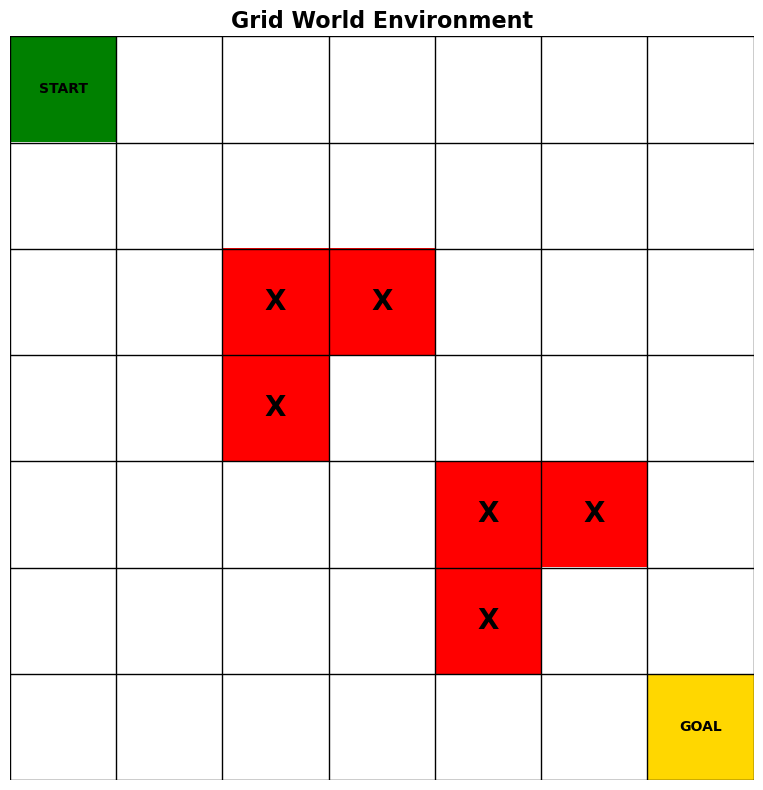

Starting Q-Learning Training...
Episodes: 1000
Grid Size: 7x7
Start: (0, 0), Goal: (6, 6)
Obstacles: [(2, 2), (2, 3), (3, 2), (4, 4), (4, 5), (5, 4)]
--------------------------------------------------
Episode 100: Avg Reward = 89.33, Avg Steps = 27.84, Epsilon = 0.061
Episode 200: Avg Reward = 98.68, Avg Steps = 12.63, Epsilon = 0.037
Episode 300: Avg Reward = 98.81, Avg Steps = 12.36, Epsilon = 0.022
Episode 400: Avg Reward = 98.84, Avg Steps = 12.24, Epsilon = 0.013
Episode 500: Avg Reward = 98.87, Avg Steps = 12.10, Epsilon = 0.010
Episode 600: Avg Reward = 98.82, Avg Steps = 12.15, Epsilon = 0.010
Episode 700: Avg Reward = 98.87, Avg Steps = 12.07, Epsilon = 0.010
Episode 800: Avg Reward = 98.87, Avg Steps = 12.08, Epsilon = 0.010
Episode 900: Avg Reward = 98.86, Avg Steps = 12.13, Epsilon = 0.010
Episode 1000: Avg Reward = 98.88, Avg Steps = 12.07, Epsilon = 0.010

Testing Learned Policy:
Starting at: (0, 0)
Step 1: Action = Right, Next State = (0, 1), Reward = -0.1
Step 2: Action

In [6]:
# Run the demonstration 
if __name__ == "__main__": 
    agent = run_qlearning_demo() 
    agent.visualize_grid()
    agent.train(episodes=1000)
    agent.test_policy()
    # Maze-like environment
    maze_agent=GridWorldQLearning.create_maze_environment()
    maze_agent.visualize_grid()
    maze_agent.train(episodes=1000)
    maze_agent.test_policy()

    # 2. Sparse rewards environment 
    Sparse_agent=GridWorldQLearning.create_sparse_environment()
    Sparse_agent.visualize_grid()
    Sparse_agent.train(episodes=1000)
    Sparse_agent.test_policy()
    